<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/M%C3%A9tododeC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consideremos el problema

$\frac{\mathrm{d^2 u} }{\mathrm{d} x^2}+u=-x$

con las condiciones $u(0)=0$ y $u(1)=0$.

Resolveremos este problema usando el método de colocación, proponemos una solución de la forma:

$U_N=\sum_{i=1}^{N}α_iβ_i(x)=α_1β_1(x)+α_2β_2(x)+...+α_Nβ_N(x)$

donde las $β_i(x)$ son llamadas funciones base.

Una medida de la aproximación de la solución $U_N$ es a través del error

$E=\frac{\mathrm{d^2 U_N} }{\mathrm{d} x^2}+U_N+x$

Para nuestro ejemplo solo necesitamos dos funciones base:

$U_N=α_1β_1(x)+α_2β_2(x)=α_1x(1-x)+α_2x^2(1-x)$

Para asegurarnos que será solución de la EDO imponemos que $E=0$, sustitimos y evaluamos en los puntos dados $x=\frac{1}{2}$ y $x=1$.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sp.symbols('x') # variable
u = sp.Function('u') # función

In [3]:
ode = u(x).diff(x,x) + u(x) + x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [4]:
sol = sp.dsolve(ode, ics={u(0):0,u(1):0}) # ics es un diccionario

In [5]:
sol

Eq(u(x), -x + sin(x)/sin(1))

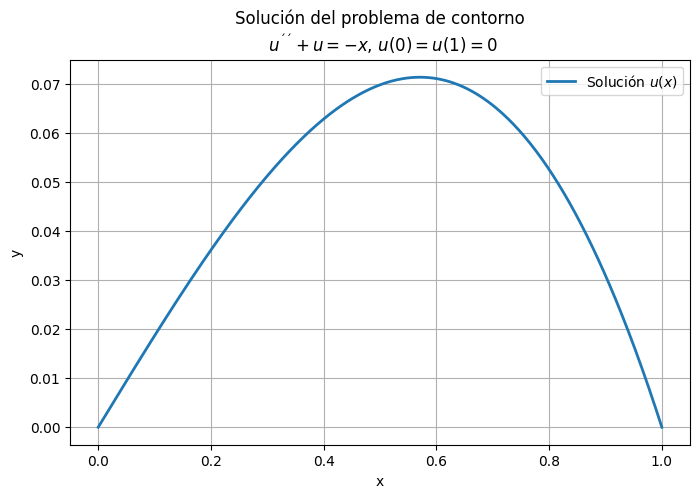

In [39]:
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr,"numpy")

xx = np.linspace(0,1,400)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n $u^{´´} + u=-x$, $u(0)=u(1)=0$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
a,b=sp.symbols('a b')

u_n= a*x*(1-x)+b*x**2*(1-x)

In [8]:
u_n

a*x*(1 - x) + b*x**2*(1 - x)

In [9]:
u_n_2=sp.diff(u_n,x,2)

F=u_n_2+u_n

In [10]:
F

a*x*(1 - x) + b*x**2*(1 - x) - 2*(a + 2*b*x + b*(x - 1))

Aquí definimos los puntos requeridos por el problema, para posteriormente igualarlos con el error, obtener el sistema de $2$x$2$ y resolverlo para obtener los valores de $α_1$ y $α_2$, en este caso se nombraron como $a$ y $b$.

In [25]:
points=[sp.Rational(1,2),1]

In [26]:
points

[1/2, 1]

In [27]:
eqs=[sp.Eq(F.subs(x,p),-p) for p in points]

sol_1=sp.solve(eqs,[a, b])

In [28]:
for eq in eqs:
    print(eq)

Eq(-7*a/4 - 7*b/8, -1/2)
Eq(-2*a - 4*b, -1)


In [29]:
print("Sistema de ecuaciones simbólico:")
for eq in eqs:
    sp.pprint(eq)

Sistema de ecuaciones simbólico:
  7⋅a   7⋅b       
- ─── - ─── = -1/2
   4     8        
-2⋅a - 4⋅b = -1


In [30]:
sol_1

{a: 3/14, b: 1/7}

In [31]:
u_approx=u_n.subs(sol_1)

In [32]:
u_approx

x**2*(1 - x)/7 + 3*x*(1 - x)/14

Calculamos el error de la aproximación numérica:

In [45]:
E=u_n_2.subs(sol_1)+u_n.subs(sol_1)+x

In [46]:
E

x**2*(1 - x)/7 + 3*x*(1 - x)/14 + x/7 - 1/7

Ahora con el error calculado evaluamos cada uno de los puntos, para comprobar si se cumple que $E=0$. Empezamos con $x=\frac{1}{2}$

In [56]:
E_a=E.subs(x,1/2)
E_a

0

Finalmente con $x=1$

In [59]:
E_b=E.subs(x,1)
E_b

0

In [33]:
u_approx_fn=sp.lambdify(x,u_approx,"numpy")

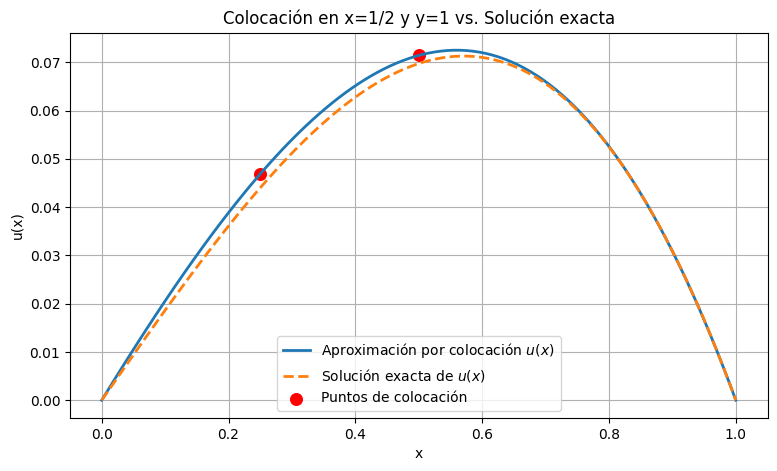

In [34]:
xx=np.linspace(0,1,100)
yy = u_num(xx)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por colocación $u(x)$", linewidth=2)
plt.plot(xx,yy, "--", label="Solución exacta de $u(x)$", linewidth=2)

plt.scatter([0.25,0.5], u_approx_fn(np.array([0.25,0.5])),
            color="red", s=70, label="Puntos de colocación")


plt.title('Colocación en x=1/2 y y=1 vs. Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()